In [27]:
import pandas as pd

In [42]:
df = pd.read_csv("annotations/video-3_annotations_20250923_185437.csv")

In [38]:
df.head()

,video_name,frame_number,state,window_size,mean_distance,median_distance,mean_player1_intensity,median_player1_intensity,mean_player2_intensity,median_player2_intensity,mean_combined_intensity,median_combined_intensity,median_player1_x,median_player1_y,median_player2_x,median_player2_y,avg_player1_x,avg_player1_y,avg_player2_x,avg_player2_y
0,video-3,49,start,50,3.980245,3.958462,0.006242,0.006260,0.020721,0.018913,0.026963,0.025462,2.037934,7.604098,5.728947,6.216748,2.037011,7.605725,5.764030,6.208920
1,video-3,85,active,50,3.458282,3.346844,0.008914,0.007401,0.026887,0.025471,0.035802,0.038481,2.007573,7.587543,5.092826,6.292304,1.947064,7.584858,5.153140,6.291265
2,video-3,99,active,50,3.235760,3.221407,0.012810,0.011660,0.038185,0.030143,0.050995,0.042552,1.820253,7.569854,4.789032,6.288717,1.835257,7.561101,4.801156,6.270826
3,video-3,149,active,50,2.693148,2.756256,0.024728,0.023783,0.050533,0.044521,0.075261,0.073094,1.295336,7.672569,3.577066,6.239268,1.299881,7.763177,3.557073,6.327764
4,video-3,199,active,50,1.939110,1.907607,0.025836,0.025408,0.028417,0.021020,0.054253,0.050622,1.575565,8.358068,2.759440,6.760212,1.672924,8.382018,2.729278,6.803009


In [39]:
df["median_distance"] = df["median_distance"].rolling(window=5).mean()

In [43]:
df = df.iloc[:100]

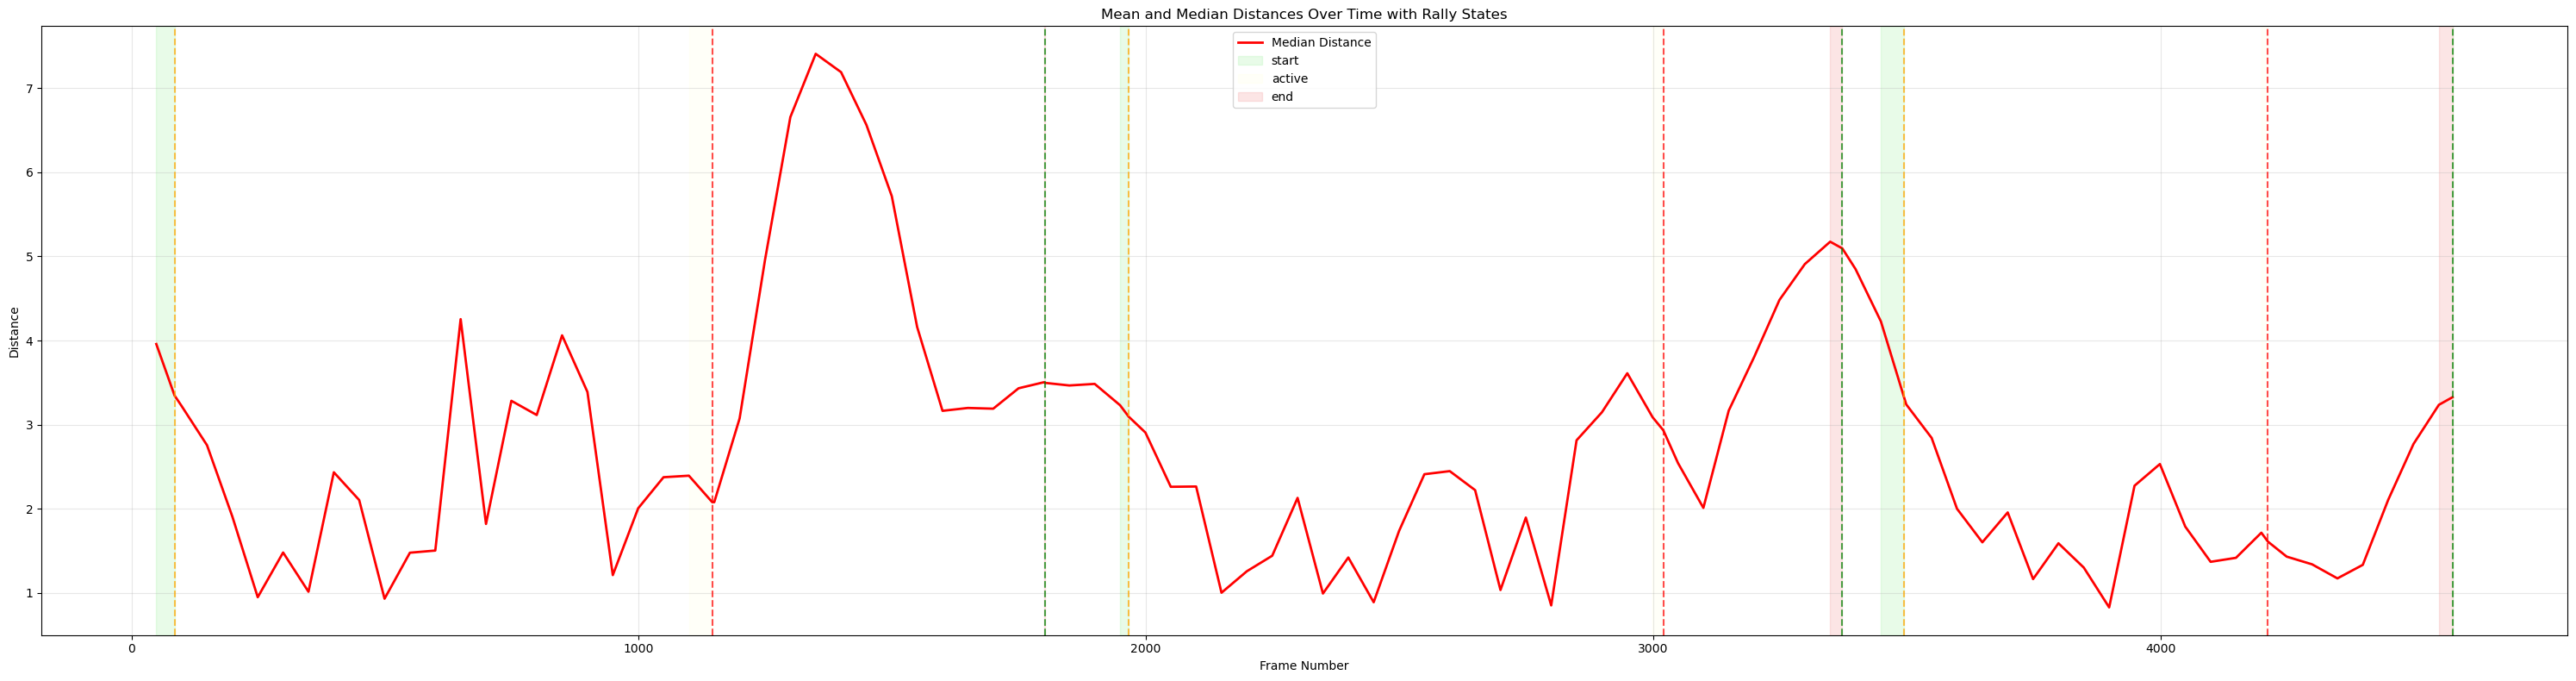

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(30, 8))

# Plot mean and median distances
# ax.plot(
#     df["frame_number"],
#     df["mean_distance"],
#     label="Mean Distance",
#     linewidth=2,
#     color="blue",
# )
ax.plot(
    df["frame_number"],
    df["median_distance"],
    label="Median Distance",
    linewidth=2,
    color="red",
)

# Add vertical dashed lines and background regions for state changes
state_colors = {
    "start": "lightgreen",
    "active": "lightyellow",
    "end": "lightcoral",
    "inactive": "lightgray",
}
state_line_colors = {
    "start": "green",
    "active": "orange",
    "end": "red",
    "inactive": "gray",
}

# Get state transitions
prev_state = None
prev_frame = None

for i, row in df.iterrows():
    current_state = row["state"]
    current_frame = row["frame_number"]

    if prev_state is not None and prev_state != current_state:
        # Add vertical dashed line at state transition
        ax.axvline(
            x=current_frame,
            color=state_line_colors.get(current_state, "black"),
            linestyle="--",
            alpha=0.7,
            linewidth=1.5,
        )

        # Add background color for previous state region
        if prev_frame is not None:
            ax.axvspan(
                prev_frame,
                current_frame,
                alpha=0.2,
                color=state_colors.get(prev_state, "white"),
                label=(
                    f"{prev_state}"
                    if prev_state not in ax.get_legend_handles_labels()[1]
                    else ""
                ),
            )

    prev_state = current_state
    prev_frame = current_frame

# Add the last region
if prev_state is not None and prev_frame is not None:
    ax.axvspan(
        prev_frame,
        df["frame_number"].max(),
        alpha=0.2,
        color=state_colors.get(prev_state, "white"),
        label=(
            f"{prev_state}"
            if prev_state not in ax.get_legend_handles_labels()[1]
            else ""
        ),
    )

ax.set_xlabel("Frame Number")
ax.set_ylabel("Distance")
ax.set_title("Mean and Median Distances Over Time with Rally States")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
df[df["state"] == "active"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,1.309512,0.037763
max,3.505738,0.307739
mean,2.195570,0.092372


In [34]:
df[df["state"] == "end"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,1.669081,0.018985
max,6.328356,0.115213
mean,3.693806,0.059735


In [35]:
df[df["state"] == "start"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,2.911610,0.012489
max,4.457809,0.035863
mean,3.458833,0.022305
